# Scraping Instagram Hashtags -  photo data

In [92]:
# RESOURCES
# 1) Find .json file for instagram data - https://medium.com/@h4t0n/instagram-data-scraping-550c5f2fb6f1
# 2) Use Request Python Library - https://www.pythonforbeginners.com/requests/using-requests-in-python
# 3) Print in color with python - https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python
# 4) Find most common word from hashtag list - https://medium.com/@agrimabahl/elegant-python-code-reproduction-of-most-common-words-from-a-story-25f5e28e0f8c
# 5) Word Cloud Data Vis - https://www.datacamp.com/community/tutorials/wordcloud-python

# Get the URL with the Data we want to scrape

In [93]:
# Import Request library to allow you to ping/request the website
import requests
import json


# What hashtag do you want to scrape about?
tag = 'marvel'
# Enter the url
url = 'https://www.instagram.com/explore/tags/' + tag + '/?__a=1'

print(url)

https://www.instagram.com/explore/tags/marvel/?__a=1


In [94]:
# Click inspect on the web url
# In JS, we want to grab the "sharedData" dictionary
# A LOT OF WORK to Parse the page and extract dictionary portion that contains all the info we want to scrape
# INSTEAD: Get that dictionary directly from instagram (better) by doing ''?__a=1'
# Use that new URL


# Define Functions for retrieving page and data

In [95]:
# Print JSON data
def jprint(data_dict):
    print(json.dumps(data_dict, indent=4))

In [96]:
# Ping and request the web page - use get request function
def get_ig_page(url, session=None):
    print('URL:', url)
    session = session or requests.Session()
    
    # Get the website
    r = session.get(url)
    # Check current status code
    r_code = r.status_code # 200 - successful request
    print('Status code:', r_code)
    
    # Check status code
    if r_code == requests.codes.ok: # True
        # Return the page
        return r
    else: 
        return None

# Script to retrieve the page 

In [97]:
# Get the data (the .json file)
ig_data_dict = get_ig_page(url)
if ig_data_dict is not None: 
    #Convert data of class <int> to class <dict> of json type from
    ig_data_dict = ig_data_dict.json()
    # Display the data
    #jprint(ig_data_dict)
else:
    print("oops, something went wrong!")

# Grab and display data 

URL: https://www.instagram.com/explore/tags/marvel/?__a=1
Status code: 200


# Play with the data

In [98]:
# Declare varaibles to store extracted data for each image
ids = []
url_ids = []
comments = []
owners = []
urls = []
likes = []
video_booleans = []
views = []
captions = []


In [99]:
# Print in color
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


# Get the data
ig_data_dict = get_ig_page(url)
print('\n\n\n')
    
   
if ig_data_dict is not None:  
    # You want to print json data, but we are returned a response object (get json)
    ig_data_dict = ig_data_dict.json()
    
    # Grab first layer <dict>
    data = ig_data_dict.get('graphql', None)
    # Grab second layer
    hashtag = data.get('hashtag', None)
    
    # Grab third layer (either top or recent posts)
    # Get TOP POSTS 
    top_posts = hashtag.get('edge_hashtag_to_top_posts', None) #dict
    if top_posts is not None:
        # Get "edges' layer before grabbing each indiv post"
        top_posts = top_posts.get('edges', None) #list
      
        # Each node is an individual post
        # Grab each node/post and scrape data from each
        for post in top_posts:
            node = post.get('node')
            print(color.PURPLE, '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~', color.END)

            # Get ID
            id = node.get('id')
            ids.append(id)
            print(color.BOLD,'Post ID:\t', color.END , id )

            # Get URL_ID
            url_id = node.get('shortcode')
            url_ids.append(url_id)
            print(color.BOLD,'Link ID:\t', color.END, url_id)

            # Get NUMBER OF COMMENTS
            comment = node.get('edge_media_to_comment').get('count')
            comments.append(comment)
            print(color.BOLD, 'Comment Count:\t', color.END, comment )

            # Get OWNER
            owner = node.get('owner').get('id')
            owners.append(owner)
            print(color.BOLD,'Owner:\t\t', color.END, owner)

            # Get DISPLAY URL
            display_url = node.get('display_url')
            urls.append(display_url)
            print(color.BOLD, 'Image: ', color.END, display_url)

            # Get NUMBER OF LIKES
            like = node.get('edge_liked_by').get('count')
            likes.append(like)
            print(color.BOLD, 'Like Count:\t', color.END, like)

            # Get Video and Video count
            video = node.get('is_video')
            video_count = node.get('video_view_count')
            video_booleans.append(video)
            views.append(video_count)
            print(color.BOLD, 'Video:\t\t', color.END, video)
            print(color.BOLD, 'Video Count:\t', color.END, video_count)

            # Get CAPTION
            caption_block = node.get('edge_media_to_caption').get('edges')
            for block in caption_block:
                caption = block.get('node').get('text')
                captions.append(caption)
            print( color.BOLD,'Caption:\n', color.END, caption)

            print('\n\n\n')
else:
    print("oops, something went wrong!")
    
    
# Grab 

URL: https://www.instagram.com/explore/tags/marvel/?__a=1
Status code: 200




 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 Post ID:	  2045492997650899068
 Link ID:	  BxjDQs7h-B8
 Comment Count:	  14
 Owner:		  8328813068
 Image:   https://scontent-sjc3-1.cdninstagram.com/vp/1edd246f7f788f05f3d52702eafba019/5D9B6F13/t51.2885-15/e35/60159625_636899556803026_1527807301460567279_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com
 Like Count:	  2987
 Video:		  False
 Video Count:	  None
 Caption:
  "Ahora tengo una familia..." 😥 ➡️ Avengers Endgame, YA EN CINES.
.
.
.
.
.
.
.
.
#avengers4 #marvel #marvelstudios #marvelcomics #avengersendgame #avengers #avengersinifinitywar #geek #geeklife #instagood #l4l #tbt #comics #cine #thanos #ironman #captainamerica #avengersannhilation #tonystark #stanlee #mcm #marvelcinematicmultiverse #xmen #wolverine #deadpool #thor #spiderman #captainmarvel #disney




 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [100]:
# Import pandas to store data in dataframe
import pandas as pd

instagram_top_posts = pd.DataFrame({ 'ID': ids,
                              'Link ID' : url_ids,
                              'Comment Count': comments,
                              'Owner': owners,
                              'Image URL': urls,
                              'Like Count': likes,
                              'Video' : video_booleans,
                              'Video Views' : views,
                              'Caption' : captions      
})



# PANDAS DATA FRAME SETTINGS
# Display entire text without truncating
pd.set_option('display.max_colwidth', -1)

print(instagram_top_posts.info())
instagram_top_posts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
ID               9 non-null object
Link ID          9 non-null object
Comment Count    9 non-null int64
Owner            9 non-null object
Image URL        9 non-null object
Like Count       9 non-null int64
Video            9 non-null bool
Video Views      1 non-null float64
Caption          9 non-null object
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 665.0+ bytes
None


ID      Link ID  Comment Count       Owner  \
0  2045492997650899068  BxjDQs7h-B8  14             8328813068   
1  2045551061448039894  BxjQdpDiJ3W  2              7419235878   
2  2045572871040740147  BxjVbA0jysz  7              1370926412   
3  2045514559955376448  BxjIKeZB5lA  151            5921572410   
4  2045612523111283456  BxjecBsI3sA  17             1696357434   
5  2045408778594390334  BxiwHJ0lZE-  10             2303149495   
6  2045433848730558285  Bxi1z-NJR9N  16             3110771174   
7  2045544613736941699  BxjO_0KAQiD  9              2542824820   
8  2045609795537857753  Bxjd0VcF-zZ  6              8098698785   

                                                                                                                                                                                           Image URL  \
0  https://scontent-sjc3-1.cdninstagram.com/vp/1edd246f7f788f05f3d52702eafba019/5D9B6F13/t51.2885-15/e35/60159625_636899556803026_1527807301460567279_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com    
1  https://scontent-sjc3-1.cdninstagram.com/vp/dd0f8064994e26b376d704a845a7754d/5D9DDD0D/t51.2885-15/e35/60215436_343250166374356_5076867535373660560_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com    
2  https://scontent-sjc3-1.cdninstagram.com/vp/d9cfdf946e3a0c6cf0f04d2a4c7ffda4/5D730E84/t51.2885-15/e35/58994666_885626588479288_4592039636787799180_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com    
3  https://scontent-sjc3-1.cdninstagram.com/vp/d8005d7848d1bd711ba0d69379125cd2/5D7BC7C4/t51.2885-15/e35/59924103_596953310803915_5232214913680286000_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com    
4  https://scontent-sjc3-1.cdninstagram.com/vp/8ba9bfd20d0ea55a54e0eec666f57df2/5CE0F853/t51.2885-15/e35/59881429_870100689996477_2148985655691870531_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com    
5  https://scontent-sjc3-1.cdninstagram.com/vp/6d4eb3fccb6627e26b3bbae1af33cb18/5D554A42/t51.2885-15/e35/60202940_138106757253922_4589439839963425488_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com    
6  https://scontent-sjc3-1.cdninstagram.com/vp/01ea958c9335bf4d6b27fe01c008a9c6/5D6ABA9D/t51.2885-15/e35/59844079_1213491718831569_2895870564881672212_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com   
7  https://scontent-sjc3-1.cdninstagram.com/vp/47561b84c1d852b6c1c6ac565c80417e/5D63B27A/t51.2885-15/e35/59936715_594178534423812_6953134030243945484_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com    
8  https://scontent-sjc3-1.cdninstagram.com/vp/76d50e46f4b15b56a80ff8c20985120d/5D6F82D3/t51.2885-15/e35/58785082_1162557323906247_6793194518464415830_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com   

   Like Count  Video  Video Views  \
0  2987        False NaN            
1  159         False NaN            
2  152         False NaN            
3  4447        False NaN            
4  217         True   482.0         
5  1294        False NaN            
6  10861       False NaN            
7  2499        False NaN            
8  483         False NaN            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Caption  
0  "Ahora tengo una familia..." 😥 ➡️ Avengers Endgame, YA EN CINES.\n.\n.\n.\n.\n.\n.\n.\n.\n#avengers4 #marvel #marvelstudios #marvelcomics #avengersendgame #avengers #avengersinifinitywar #geek #geeklife #instagood #l4l #tbt #comics #cine #thanos #ironman #captainamerica #avengersannhilation #tonystark #stanlee #mcm #marvelcinematicmultiverse #xmen #wolverine #deadpool #t

# Define functions for getting other hashtags in the caption

In [101]:
# Get captions
def flatten_list(list_item):
    if list_item:
        flat = ''.join(list for list in list_item if list is not None)
        return flat
    return None

# Get tags
def get_tags(text):
    tags = set()
    if text is not None:
        text = text.split(' ')
        for word in text:
            if word.startswith('#'):
                word = word.strip('#')
                yield word


# Store caption and its hashtags

In [102]:
# Get all captions from each post and put them together all in one string
all_captions = flatten_list(captions)

if all_captions is not None:
    # From that string, find all hashtags in captions
    tags = list(get_tags(all_captions))

print('We have ', len(captions), 'captions total')
print('We have ', len(tags), 'tags total')

We have  9 captions total
We have  132 tags total


In [103]:
# See what tags we extracted
for tag in tags:
    print('#{}'.format(tag))  


#marvel
#marvelstudios
#marvelcomics
#avengersendgame
#avengers
#avengersinifinitywar
#geek
#geeklife
#instagood
#l4l
#tbt
#comics
#cine
#thanos
#ironman
#captainamerica
#avengersannhilation
#tonystark
#stanlee
#mcm
#marvelcinematicmultiverse
#xmen
#wolverine
#deadpool
#thor
#spiderman
#captainmarvel
#disneyThanos

Artist:
#marvel
#tattoo
#comictattoo
#marveltattoo
#thanostattoo
#marveltattooartNew
#spiderman
#marvel
#marvelcosplay
#spidermanps4
#spidermanps4cosplay
#faceshell
#marvelcomics
#cosplay
#begreater
#esusuitHey
#itstime
#getlexiverified
#marvel
#avengers
#endgame
#morganstark
#godzilla
#warnerbrothers
#godzillakingofthemonstersКакой
#marvel
#spiderman
#футбол
#танцы
#dancedance
#dance
#model
#топ
#стиль#chrishemsworth
#thor
#marvel
#thor
#actor
#disney
#centrfitAvengers
#captainmarvel
#marvel#marvelstudios
#marvelcomics
#avengers#avengersinfinitywar
#sciencebros
#brielarson#gaurdiansofthegalaxy
#captainamerica
#ironman#spidermanfarfromhome
#spidermanhomecoming#spiderman
#tha

# Analyze hashtag

In [104]:
# LIST VIEW
import collections
import re
import matplotlib.pyplot as plt
%matplotlib inline

wordcount = collections.defaultdict(int)

# Find most repeated hashtag from the list
for word in tags:
    if word in tags:
        #print(word)
        wordcount[word] += 1     
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)

# Print each hashtag and the number of times it was repeated
for word, count in mc:
    print(word.strip('#'), ":", count)


    
    

        


marvel : 8
marvelcomics : 4
avengersendgame : 3
thanos : 3
thor : 3
spiderman : 3
captainmarvel : 3
endgame : 3
avengers : 2
ironman : 2
captainamerica : 2
infintywar : 2
robertdowneyjr : 2
hughjackman : 2
tomholland : 2
benedictcumberbatch : 2
justiceleague : 2
marvelcinematicuniverse : 2
chrishemsworth : 2
spidermanfarfromhome : 2
dceu : 2
marvelstudios : 1
avengersinifinitywar : 1
geek : 1
geeklife : 1
instagood : 1
l4l : 1
tbt : 1
comics : 1
cine : 1
avengersannhilation : 1
tonystark : 1
stanlee : 1
mcm : 1
marvelcinematicmultiverse : 1
xmen : 1
wolverine : 1
deadpool : 1
disneyThanos

Artist: : 1
tattoo : 1
comictattoo : 1
marveltattoo : 1
thanostattoo : 1
marveltattooartNew : 1
marvelcosplay : 1
spidermanps4 : 1
spidermanps4cosplay : 1
faceshell : 1
cosplay : 1
begreater : 1
esusuitHey : 1
itstime : 1
getlexiverified : 1
morganstark : 1
godzilla : 1
warnerbrothers : 1
godzillakingofthemonstersКакой : 1
футбол : 1
танцы : 1
dancedance : 1
dance : 1
model : 1
топ : 1
стиль#chrishem

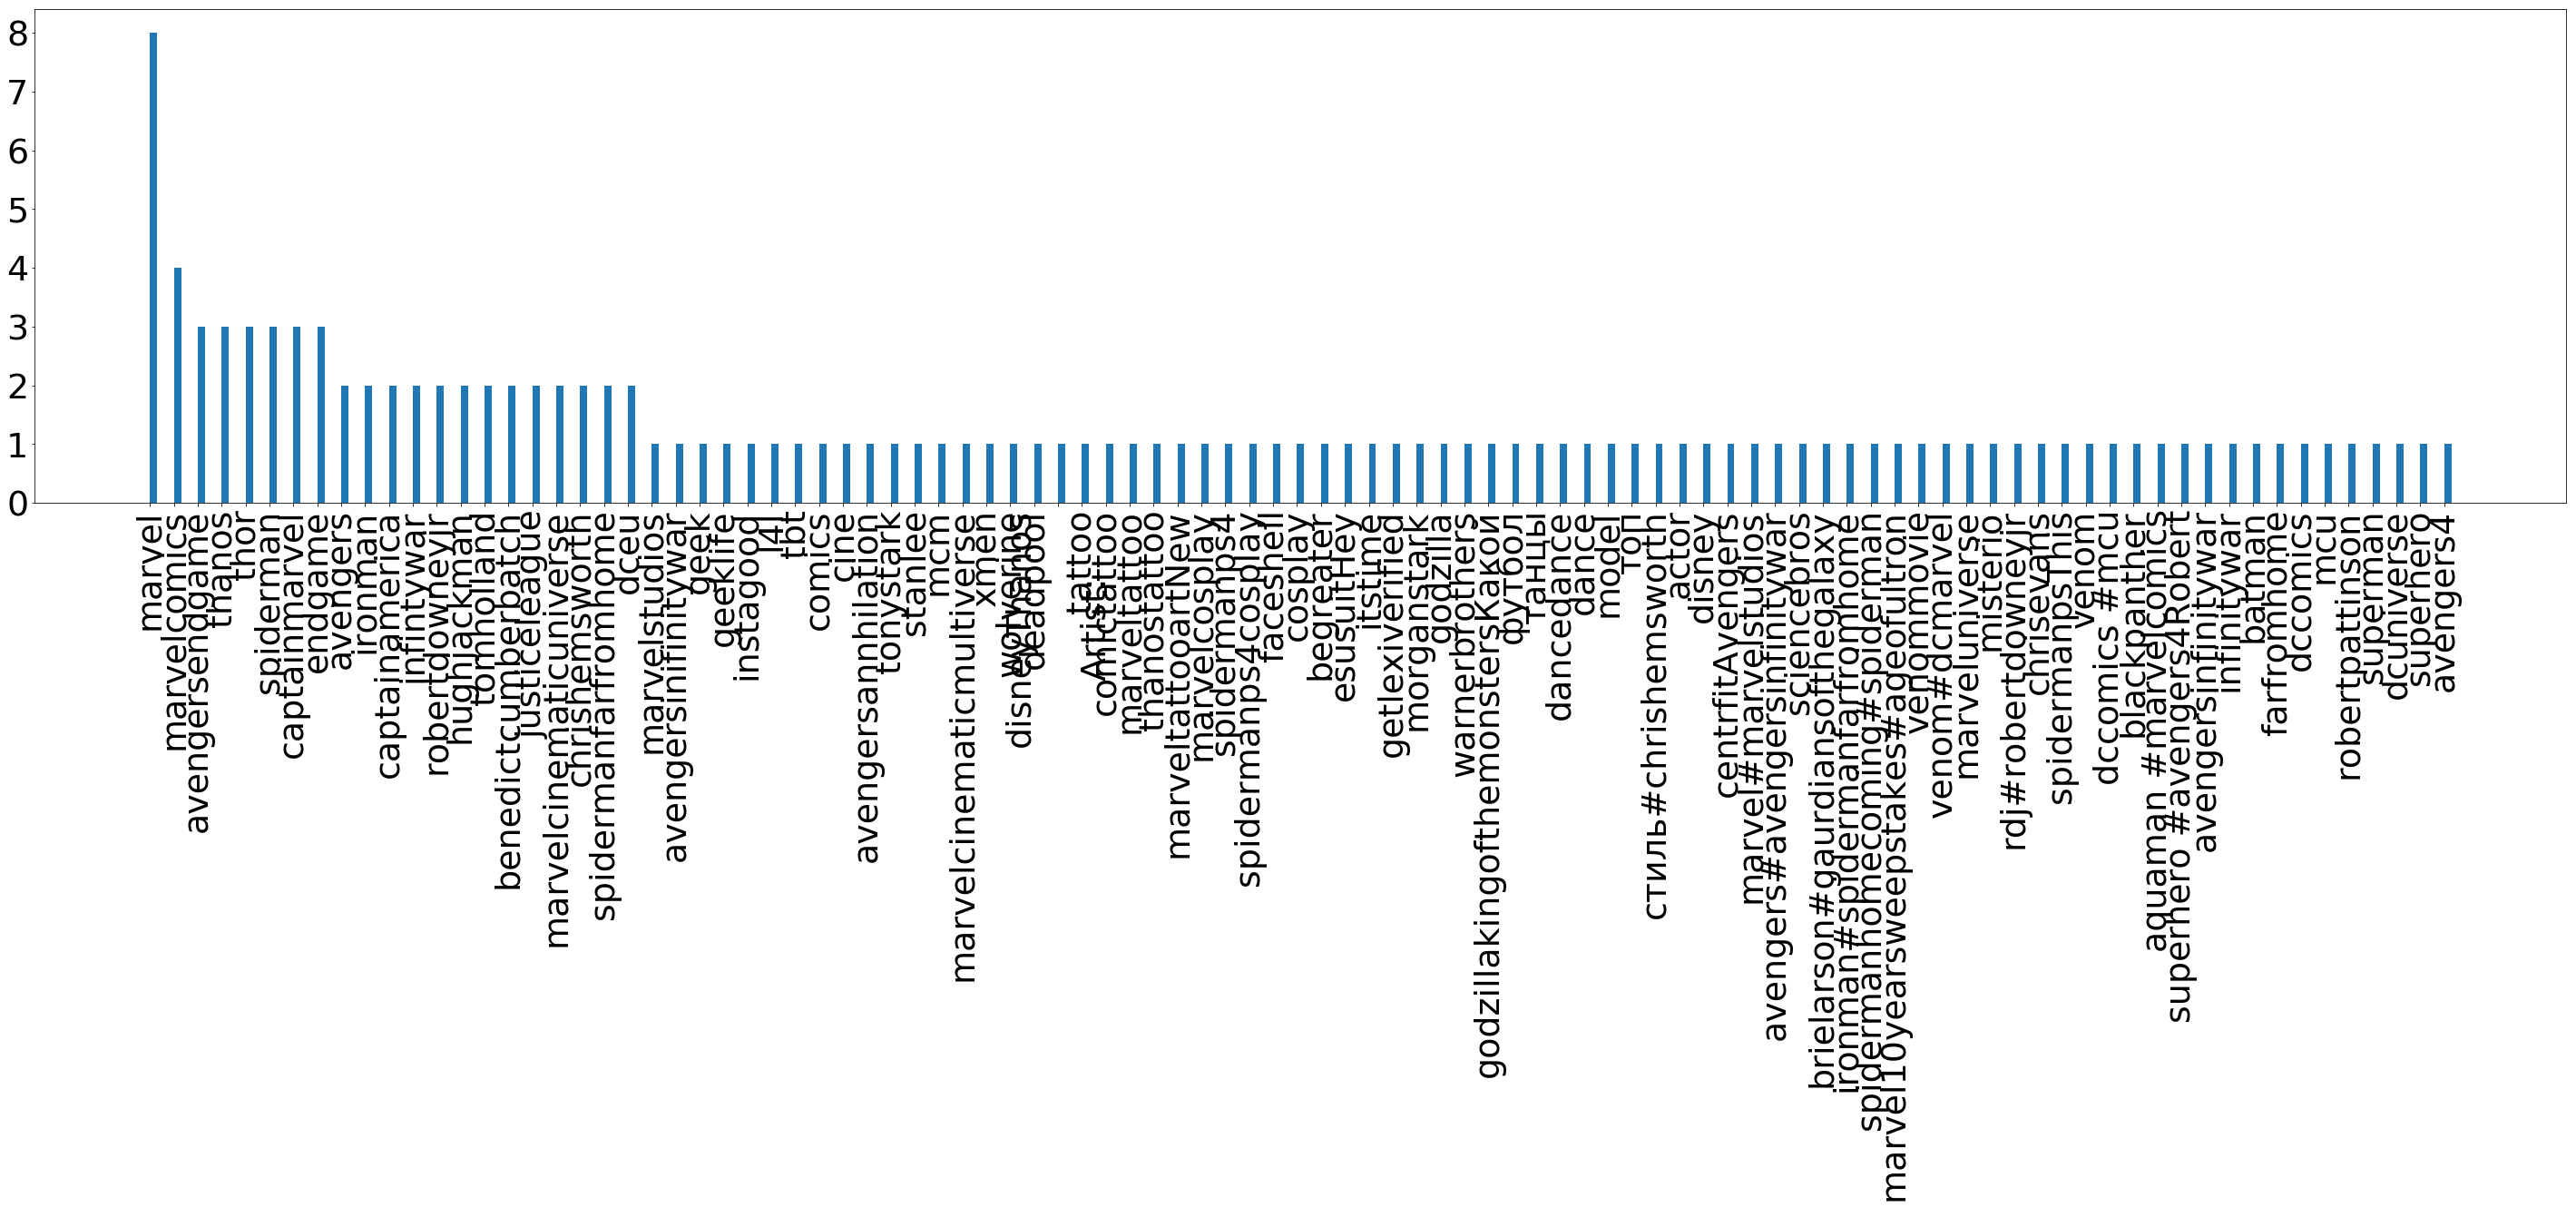

<Figure size 432x288 with 0 Axes>

In [105]:
# CHART VIEW
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())

# Customize Graph
plt.figure(figsize=(50,10))
plt.xticks(rotation='vertical', fontsize=38)
plt.yticks(fontsize=38)
plt.bar(range(len(mc)), values, tick_label=names, align='edge', width=.3)

# Display and save graph
plt.savefig('bar.png')
plt.savefig('bar.pdf')
plt.show()
plt.draw()


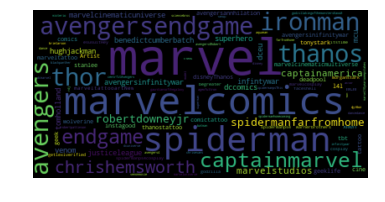

In [106]:
# WORD CLOUD VIEW
import numpy as np
import pandas as pd
from os import path
from PIL import Image # Import Python Imaging Library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
# Data Vis technique to show which words are most frequent upon a given string

import matplotlib.pyplot as plt
%matplotlib inline
tag_string = ""

# Get text to visualize
for word in tags:
    tag_string+=' '
    tag_string+=word.strip('#')
    
# Generate word cloud     
wordcloud = WordCloud(max_font_size=60, max_words=100, background_color="black").generate(tag_string) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()